# Get JOGL objects and convert it to a Pandas DataFrame

Here we are going to learn how to get a lot of JOGL objects and convert them to a panda dataframe. 

We are going to recover the 5 main types of objects on JOGL using the API.
- User
- Project
- Community
- Need
- Challenge

Alright as for dependencies, we will need:
- pandas
- requests
- tqdm
- json

The API endpoints are:
- List all objects https://jogl-backend.herokuapp.com/api/:objects/?page=:page_nb
- Get one object https://jogl-backend.herokuapp.com/api/:objects/:id

In [1]:
import pandas as pd
import requests
import json
from tqdm.notebook import tqdm #This will give us nice progress bars !

## Let's make some helper function

We don't want to have to repeat ourselves DRY ! (Don't Repeat Yourself)

In [2]:
def make_url_index(object_type, page):
    payload = {'page': page}
    url = "https://jogl-backend.herokuapp.com/api/{}".format(object_type)
    return url, payload

def make_url_get(object_type, object_id):
    url = "https://jogl-backend.herokuapp.com/api/{}/{}".format(object_type, object_id)
    return url

In [3]:
def get_all_with_pagination(object_type):
    objects = []
    current_page = 1
    total_page = 0 
    while current_page <= total_page or total_page == 0:
        results, current_page, total_page = get_index(object_type, current_page)
        objects += results
        current_page += 1
    return objects
    
def get_index(object_type, current_page):
    print("getting object type {} page {}".format(object_type, current_page))
    url, payload = make_url_index(object_type, current_page)
    r = requests.get(url, params=payload)
    return [r.json(), int(r.headers['Current-Page']), int(r.headers['Total-Pages'])]

## Alright, now that our helpers are finished we can then call it to get our objects and store them in a panda dataframe.
As a reminder, here are some of the available object types (more at https://documenter.getpostman.com/view/8688524/SWE84xMg?version=latest#16bd80d4-cb8f-40b3-b487-64466e4293ff)
- User => "users"
- Project => "projects"
- Need => "needs"
- Group => "communities"
- Challenge => "challenges"


# Projects


In [4]:
projects = get_all_with_pagination("projects")

getting object type projects page 1


In [5]:
projects_df = pd.io.json.json_normalize(projects)

In [6]:
# here we see dataframe using function .head()
projects_df.head(140)

id                                              title      short_title  \
0      1                                           JOGLmeta             JOGL   
1      2              Expédition Sagesse - A Wisdom Journey   AWisdomJourney   
2      3                                       Containerlab     Containerlab   
3      4                                     Robot Missions    robotmissions   
4      5                                    Project: Ikigai           Ikigai   
..   ...                                                ...              ...   
135  212                                   Basic Respirator  BasicRespirator   
136  213                              Visière Découpe Laser     CoronaShield   
137  214                             Visière Impression 3D   3dCornonaShield   
138  215  Supporting out-of-school students with STEM ed...       VoltSchool   
139  216                 Global Free Webinars for Students   studentwebinars   

                                            banner_url  \
0    https://jogl-backend.herokuapp.com/rails/activ...   
1    https://jogl-backend.herokuapp.com/rails/activ...   
2    https://jogl-backend.herokuapp.com/rails/activ...   
3    https://jogl-backend.herokuapp.com/rails/activ...   
4    https://jogl-backend.herokuapp.com/rails/activ...   
..                                                 ...   
135  https://jogl-backend.herokuapp.com/rails/activ...   
136  https://jogl-backend.herokuapp.com/rails/activ...   
137  https://jogl-backend.herokuapp.com/rails/activ...   
138                                                      
139  https://jogl-backend.herokuapp.com/rails/activ...   

                                         banner_url_sm  \
0    https://jogl-backend.herokuapp.com/rails/activ...   
1    https://jogl-backend.herokuapp.com/rails/activ...   
2    https://jogl-backend.herokuapp.com/rails/activ...   
3    https://jogl-backend.herokuapp.com/rails/activ...   
4    https://jogl-backend.herokuapp.com/rails/activ...   
..                                                 ...   
135  https://jogl-backend.herokuapp.com/rails/activ...   
136  https://jogl-backend.herokuapp.com/rails/activ...   
137  https://jogl-backend.herokuapp.com/rails/activ...   
138                                                      
139  https://jogl-backend.herokuapp.com/rails/activ...   

                                     short_description status  \
0                                This is JOGL on JOGL.  draft   
1    A Wisdom Journey is a cooperative educative ga...  draft   
2    Turning a cargo container into a fully equippe...  draft   
3                 Robots to collect plastic on beaches  draft   
4                        A Life design lab at the CRI!  draft   
..                                                 ...    ...   
135  A low cost, disposable, flexible and custom-fi...  draft   
136  Une visière qui suivre l'exigences du médecine...  draft   
137  Une model du visière en impression 3D qui répo...  draft   
138  Digital platform to support STEM learning for ...  draft   
139  We'd like to help students all over the world ...  draft   

                                                skills  \
0    [react, collaboration, open science, ruby on r...   
1    [Education , Teaching, Enseignement, Game Desi...   
2            [prototyping, design,  research, biotech]   
3                                 [Community building]   
4    [Personal growth, Life design, Life skills, Mi...   
..                                                 ...   
135  [Clinical validation, Medical worker, Medical ...   
136  [3D-Design, lasercutting, Material Sourcing, m...   
137   [3D-printing, 3D-Design, design thinking, gcode]   
138  [Web development, Graphic design, Fullstack, S...   
139  [Education, Teaching, Webinar management, Scie...   

                    interests badges  ... has_clapped has_followed creator.id  \
0                     [9, 17]     []  ...       False        False          1   
1          

In [7]:
projects_df.shape

(144, 37)

In [12]:
#project_df is dataframe type
print(type(projects_df))
print('All values of the first column')
projects_df.iloc[0]

<class 'pandas.core.frame.DataFrame'>
Hello world


id                                                                     1
title                                                           JOGLmeta
short_title                                                         JOGL
banner_url             https://jogl-backend.herokuapp.com/rails/activ...
banner_url_sm          https://jogl-backend.herokuapp.com/rails/activ...
short_description                                  This is JOGL on JOGL.
status                                                             draft
skills                 [react, collaboration, open science, ruby on r...
interests                                                        [9, 17]
badges                                                                []
documents              [{'id': 47, 'content_type': 'application/pdf',...
country                                                             None
city                                                                None
address                                            

## Consideration for the list of users of an object
Due to API optimisation and async calls, the list of users of an object is not rendered by the Index or Show API endpoints, but there is a special API endpoint to get the members of an object, this is the `/members`.

Get members of an object https://jogl-backend.herokuapp.com/api/:objects/:id/members

Let's make a function to get the members of an object so that we can add to our previous function results the full list of members

In [22]:
def make_url_members(object_type, object_id):
    url = "https://jogl-backend.herokuapp.com/api/{}/{}/members".format(object_type, object_id)
    return url

def get_members(object_type, object_id):
    url = make_url_members(object_type, object_id)
    r = requests.get(url)
    return r.json()

def add_members_to_object(object_type, objects):
    if object_type not in ['projects', 'needs', 'communities', 'challenges']:
        raise Exception("The object type is incorrect !")
    result = []
    for obj in tqdm(objects):
        object_id = obj["id"]
        members = get_members(object_type, object_id)
        obj['users'] = members['users']
        result.append(obj)
    return result

In [23]:
projects = add_members_to_object("projects", projects)

# Let's plot the lat and lon of all projects


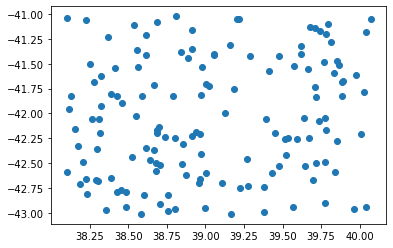

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd



#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
#df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        lon = projects_df.iloc[:,36], #projects_df['geoloc.lon'],
        lat = projects_df.iloc[:,35], #projects_df['geoloc.lat'],
        text = projects_df['title'],
        mode = 'markers',
        #marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'JOGL map '
        #geo_scope='europe',
    )
fig.show()






x_lat = projects_df.iloc[:,35]
y_lon = projects_df.iloc[:,36]

plt.plot(x_lat, y_lon, 'o')

## Let's save it as a JSON because it is a nested object

In [25]:
projects_json = json.dumps(projects)
f = open("data_jogl/projects.json", 'w')
f.write(projects_json)
f.close()

## we also save it as a CSV because CSV is just good tabular format for data


In [26]:
projects_df = pd.DataFrame.from_dict(projects)

In [28]:
projects_df.to_csv("data_jogl/projects.csv")

# Users


In [29]:
users = get_all_with_pagination("users")

getting object type users page 1
getting object type users page 2
getting object type users page 3
getting object type users page 4
getting object type users page 5
getting object type users page 6
getting object type users page 7
getting object type users page 8
getting object type users page 9
getting object type users page 10
getting object type users page 11
getting object type users page 12
getting object type users page 13
getting object type users page 14
getting object type users page 15
getting object type users page 16
getting object type users page 17
getting object type users page 18
getting object type users page 19
getting object type users page 20
getting object type users page 21


In [31]:
users_df = pd.io.json.json_normalize(users)

In [33]:
users_df.head(20)

id     first_name          last_name          nickname     affiliation  \
0   4502       Grégoire              Leroy         retenodus         Ubisoft   
1   1636        Amarino           Oliveira   AmarinoOliveira            None   
2   4604           Anup             Ghosal               Anu            None   
3   3985          Oumar             Aidara            oldena           omara   
4    847         Michal           Milewicz             t1waz  no affiliation   
5    924          David               Lang        DavidTLang     Sofar Ocean   
6   4260  jorge americo          dominguez      jorgeamerico    architecture   
7    857            Lea         Jungnickel      ynotzoidb3rg            None   
8    809          chris              harry        chrisharry          myself   
9   3183          Ankit                Raj          AnkitRaj            None   
10   859          Paolo            Vicario               Vik            None   
11  1149            Rui            Parente        RuiParente        Portugal   
12   696          Ramon            Mendoza             Ramon         Private   
13   889          anoop                bal          anoopbal         company   
14  4374        Raphaël              Béchu              raph      Groupe ADP   
15  3459         Gilles             Bonnes      GillesBonnes    Pôle emploi    
16   250           Thea       Chrysostomou  TheaChrysostomou            None   
17  4422        Tiffany            Enering    TiffanyEnering     High School   
18   974         Duarte             Santos      DuarteSantos               .   
19  1020         Sergio  Aranda de la Cruz           Verayle   FabLab Xtrene   

            category   country           city  \
0    fulltime_worker    France  Paris, France   
1               None      None           None   
2               None      None           None   
3    fulltime_worker      None           None   
4    fulltime_worker      None           None   
5    fulltime_worker      None           None   
6    fulltime_worker   Germany         Berlin   
7               None      None           None   
8    fulltime_worker        US                  
9               None      None           None   
10              None      None           None   
11   fulltime_worker  Portugal          Porto   
12   fulltime_worker      None           None   
13   fulltime_worker      None           None   
14   fulltime_worker      None           None   
15      between_jobs    France     Roquevaire   
16              None      None           None   
17  fulltime_student      None           None   
18   fulltime_worker      None           None   
19   fulltime_worker     Spain   Almendralejo   

                                                  bio  \
0   I'm a devops in telecommunications and Cloud s...   
1                                                None   
2                                                None   
3   j'aime les nouvelles techenologie, decouvrir d...   
4                                                None   
5                                                None   
6                                                None   
7                                                None   
8   Validation and Testing Engineer with Masters D...   
9                                                None   
10                                               None   
11                                               None   
12                                               None   
13                                               None   
14                                               None   
15                                               None   
16                                               None   
17                                               None   
18                                               None   
19                                               None   

                                            short_bio  ... follower_count  \
0                   

In [15]:
users_json = json.dumps(users)
f = open("users/data/users.json", 'w')
f.write(users_json)
f.close()

In [16]:
users_df = pd.DataFrame.from_dict(users)

In [17]:
users_df.to_csv("users/data/users.csv")

# Plotting statistics about users
Let us first plot the country, then their skills

In [47]:
import numpy as np

# get all countries 
countries = users_df.country.values
print(type(countries))

# using list comprehension to remove None values in list 
list_coun = countries.tolist()
countries_clean = [i for i in list_coun if i] 

print(countries_clean)

<class 'numpy.ndarray'>
['France', 'Germany', 'US', 'Portugal', 'France', 'Spain', 'Spain', 'Portugal', 'Germany', 'Portugal', 'Portugal', 'United State of America', 'India', 'United States', 'United States', 'France', 'United States', 'Belgium', 'France', 'Israel', 'Portugal', 'Germany', 'France', 'Portugal', 'Espagne', 'China', 'India', 'Austria', 'France ', 'Maroc', 'Lebanon', 'United Kingdom', 'India', 'United Kingdom', 'United States', 'USA', 'Portugal', 'France', 'France', 'Belgique', 'Mexico', 'Brazil', 'South Africa', 'Portugal', 'Spain', 'France', 'Slovenia', 'Portugal', 'France', 'Denmark', 'USA', 'United States', 'Canada', 'France', 'France', 'United States', 'peru', 'pakistan', 'Australia', 'Germany', 'Portugal', 'Portugal', 'Sweden', 'United States', 'Switzerland and USA', 'United Kingdom', 'Portugal', 'United Kingdom', 'United Kingdom', 'Nigeria', 'France', 'Portugal', 'Portugal', 'United States', 'France', 'FRANCE', 'Romania', 'Portugal', 'France', 'France', 'France', 'F

number of countries 180


([<matplotlib.axis.XTick at 0x1ad29f9f240>,
 <a list of 180 Text xticklabel objects>)

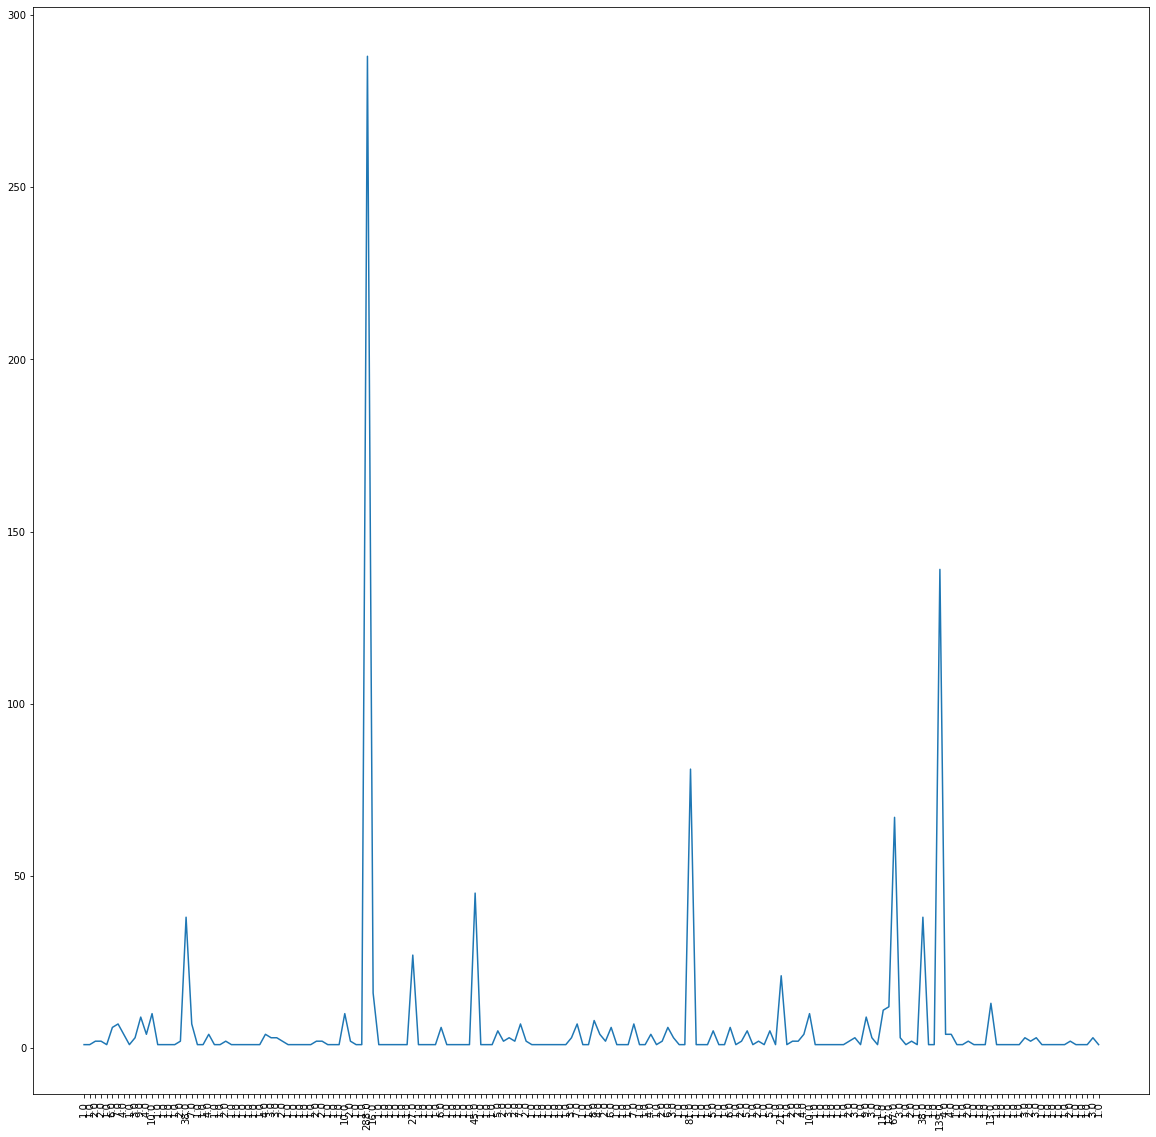

In [52]:
# plot diagram from all countries
import matplotlib.pyplot as plt

unique_countries = np.unique(countries_clean)
print('number of countries', len(unique_countries))

countries_count = np.zeros(len(unique_countries))
for ind in range(0, len(unique_countries)):
    countries_count[ind] = countries_clean.count(unique_countries[ind])

fig = plt.figure(figsize=(20,20))
plt.plot(unique_countries, countries_count )#
plt.xticks((unique_countries), (countries_count), rotation='vertical')



# Needs


In [18]:
needs = get_all_with_pagination("needs")

getting object type needs page 1


In [19]:
needs_df = pd.io.json.json_normalize(needs)

In [20]:
needs_df.head()

id                                 title  \
0   1  Find an Open-Source Plastic Extruder   
1   2                   Learning Objectives   
2   3                  GameJam Participants   
3  36                                  Time   
4  37                   Explainer Animation   

                                             content  \
0  Hi Folks,\n\nWe are working hard to design an ...   
1  The three main actors for creating a serious e...   
2  A GameJam will be held on the 9th of October d...   
3     We need lots of time to look through more data   
4  Hello,\n\nSo we try to keep HERA as simple as ...   

                                           documents  status  feed_id  \
0  [{'id': 208, 'content_type': 'application/pdf'...  active      317   
1                                                 []  active      318   
2                                                 []  active      319   
3                                                 []  active      384   
4                                                 []  active      385   

                                            users_sm skills ressources  \
0  [{'id': 9, 'first_name': 'Bob', 'last_name': '...     []         []   
1  [{'id': 255, 'first_name': 'Toufic', 'last_nam...     []         []   
2  [{'id': 255, 'first_name': 'Toufic', 'last_nam...     []         []   
3  [{'id': 101, 'first_name': 'Christopher LB', '...     []         []   
4  [{'id': 252, 'first_name': 'Aral', 'last_name'...     []         []   

   follower_count  ...  is_admin  is_member  has_followed  has_clapped  \
0               5  ...     False      False         False        False   
1               1  ...     False      False         False        False   
2               0  ...     False      False         False        False   
3               0  ...     False      False         False        False   
4               2  ...     False      False         False        False   

   creator.id  creator.first_name  creator.last_name  \
0           9                 Bob           VRIGNAUD   
1         255              Toufic           Khoriaty   
2         255              Toufic           Khoriaty   
3         101      Christopher LB             Graham   
4         252                Aral            Sürmeli   

                                    creator.logo_url  project.id  \
0  https://jogl-backend.herokuapp.com/rails/activ...           6   
1  https://jogl-backend.herokuapp.com/rails/activ...          22   
2  https://jogl-backend.herokuapp.com/rails/activ...          22   
3  https://jogl-backend.herokuapp.com/rails/activ...          26   
4         /static/media/default-user-11.748860b8.png          18   

                                       project.title  
0                                    Plastic Odyssey  
1                  Vaccination Awareness Escape Game  
2                  Vaccination Awareness Escape Game  
3                                   Vaccine DataDump  
4  HERA: a mobile health platform to improve refu...  

[5 rows x 24 columns]

In [21]:
needs_json = json.dumps(needs)
f = open("needs/data/needs.json", 'w')
f.write(needs_json)
f.close()

In [22]:
needs_df = pd.DataFrame.from_dict(needs)

In [23]:
needs_df.to_csv("needs/data/needs.csv")

# Communities


In [24]:
communities = get_all_with_pagination("communities")

getting object type communities page 1


In [25]:
communities_df = pd.io.json.json_normalize(communities)

In [26]:
communities_df.head()

id                      title    short_title  \
0   1   Just One Giant Community  JOGLcommunity   
1   2                     Biotop         Biotop   
2   3          Open Science MOOC         OSMOOC   
3   4  Lecturers without borders         LeWiBo   
4   5                   BrainBox       brainbox   

                                          banner_url  \
0  https://jogl-backend.herokuapp.com/rails/activ...   
1  https://jogl-backend.herokuapp.com/rails/activ...   
2  https://jogl-backend.herokuapp.com/rails/activ...   
3  https://jogl-backend.herokuapp.com/rails/activ...   
4  https://jogl-backend.herokuapp.com/rails/activ...   

                                       banner_url_sm  \
0  https://jogl-backend.herokuapp.com/rails/activ...   
1  https://jogl-backend.herokuapp.com/rails/activ...   
2  https://jogl-backend.herokuapp.com/rails/activ...   
3  https://jogl-backend.herokuapp.com/rails/activ...   
4  https://jogl-backend.herokuapp.com/rails/activ...   

                                   short_description  status  \
0  This is the community page for Just One Giant ...  active   
1  Biotop is a group of scientists developing a p...  active   
2  This is a mission-driven project to help make ...  active   
3  Lecturers without borders are scientists and e...  active   
4  BrainBox is a Web app where everyone can colla...  active   

                                              skills ressources  \
0                                    [collaboration]         []   
1  [biology, computational biology, data science,...         []   
2                                         [research]         []   
3  [data science, Science of education, Science o...         []   
4                            [interest in brains :)]         []   

                                           interests  ... is_admin is_member  \
0  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  ...    False     False   
1        [4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17]  ...    False     False   
2  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  ...    False     False   
3                                     [1, 4, 11, 16]  ...    False     False   
4                                                [3]  ...    False     False   

  has_clapped  has_followed creator.id creator.first_name  creator.last_name  \
0       False         False          1                Leo            Blondel   
1       False         False         11              Lukas             Hutter   
2       False         False         16                Jon            Tennant   
3       False         False         15                Liu                Bov   
4       False         False         21              Katja              Heuer   

                                    creator.logo_url  geoloc.lat  geoloc.lng  
0  https://jogl-backend.herokuapp.com/rails/activ...   38.413802  -41.411683  
1  https://jogl-backend.herokuapp.com/rails/activ...   38.940896  -42.895506  
2  https://jogl-backend.herokuapp.com/rails/activ...   40.008786  -42.597501  
3  https://jogl-backend.herokuapp.com/rails/activ...   39.748910  -41.888831  
4  https://jogl-backend.herokuapp.com/rails/activ...   39.637983  -42.428054  

[5 rows x 30 columns]

In [27]:
communities_json = json.dumps(communities)
f = open("communities/data/communities.json", 'w')
f.write(communities_json)
f.close()

In [28]:
communities_df = pd.DataFrame.from_dict(communities)

In [29]:
communities_df.to_csv("communities/data/communities.csv")

# Let's plot skills cloud for all projects

In [ ]:

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.iloc[:,7]: #skills
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloudskills = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
